In [1]:
import pandas as pd

feather_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label'] 
data = pd.read_csv('iris.data', header=None, names=feather_names)

# 提取有的类别
category = list(set(data.iloc[:, -1].values))

# 转化成012
for i in range(len(data.iloc[:, -1])):
    if data.iloc[i, -1]==category[2]:
        data.iloc[i, -1] = 0
    elif data.iloc[i, -1]==category[1]:
        data.iloc[i, -1] = 1
    elif data.iloc[i, -1]==category[0]:
        data.iloc[i, -1] = 2

# 输出
print('数据集包含以下类别：', category)

# 提取数据
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1].values

data.info()

数据集包含以下类别： ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Figure size 640x480 with 0 Axes>

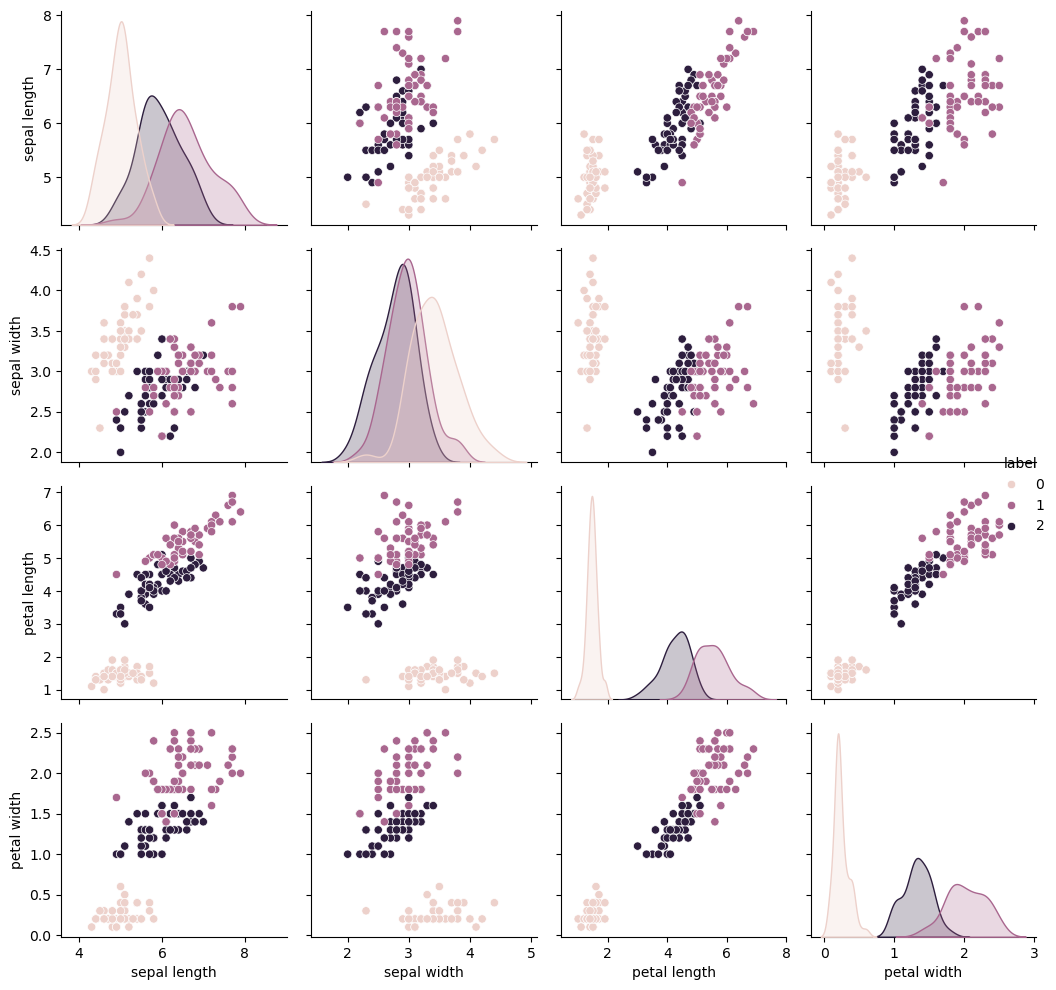

In [2]:
# 可视化(散点图 )
# 对角线为密度图
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.pairplot(data, hue='label')
plt.tight_layout()
plt.show()

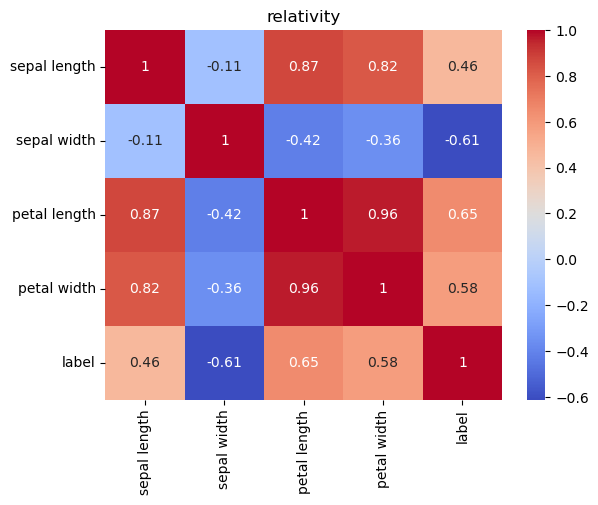

In [3]:
plt.figure()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('relativity')
plt.show()

In [4]:
# 创建新特征，花瓣面积和花萼面积
data['petal_area'] = data['petal length'] * data['petal width']
data['sepal_area'] = data['sepal length'] * data['sepal width']
data.head()

,sepal length,sepal width,petal length,petal width,label,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0,0.28,17.85
1,4.9,3.0,1.4,0.2,0,0.28,14.70
2,4.7,3.2,1.3,0.2,0,0.26,15.04
3,4.6,3.1,1.5,0.2,0,0.30,14.26
4,5.0,3.6,1.4,0.2,0,0.28,18.00


In [5]:
from sklearn.svm import SVC

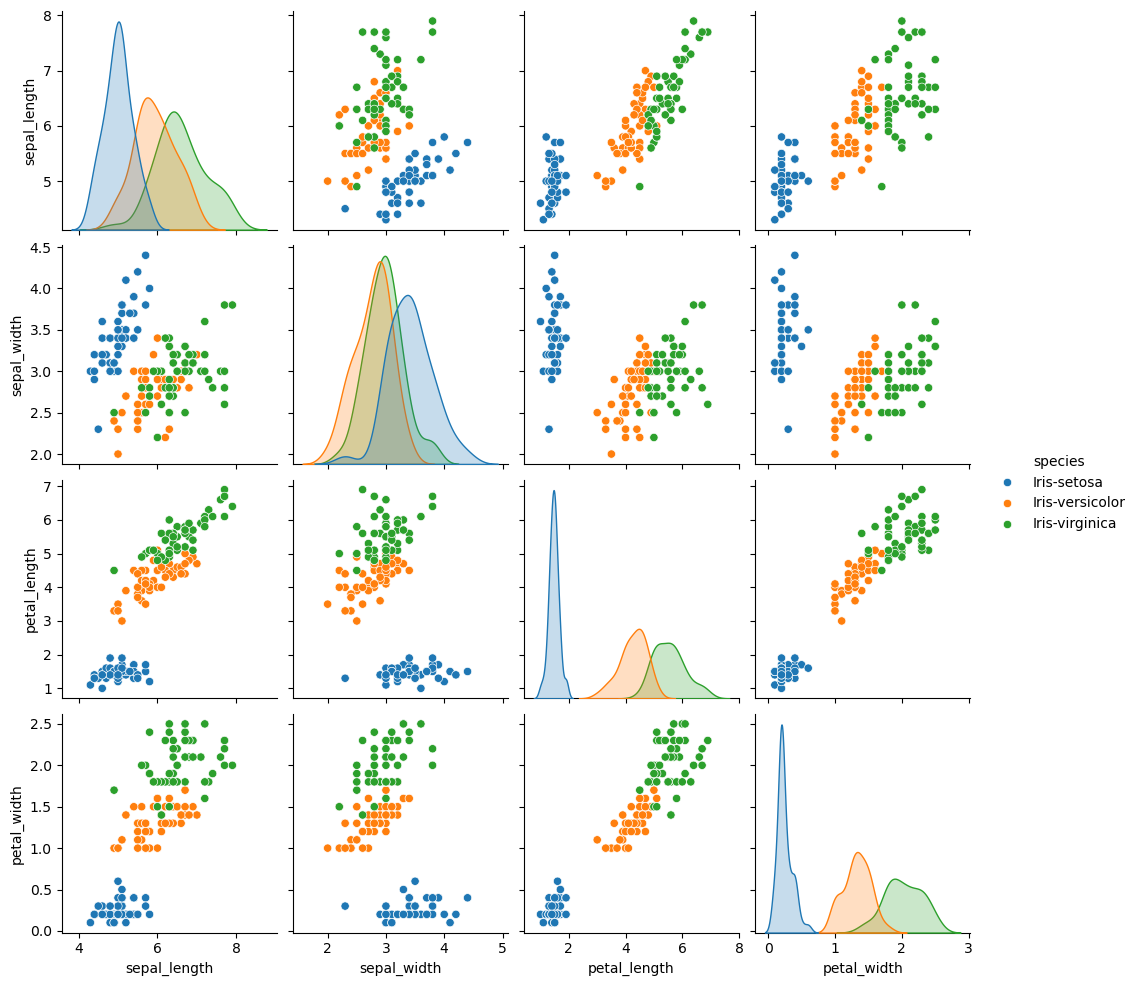

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



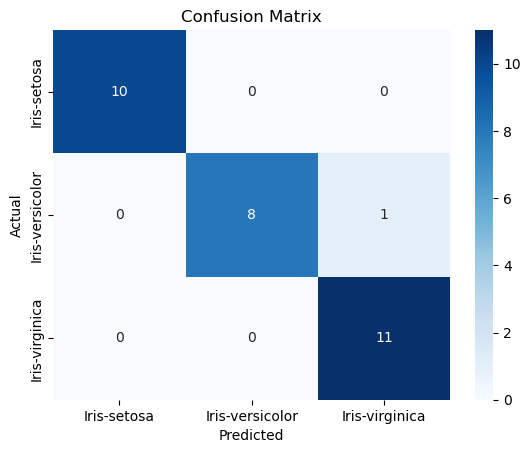

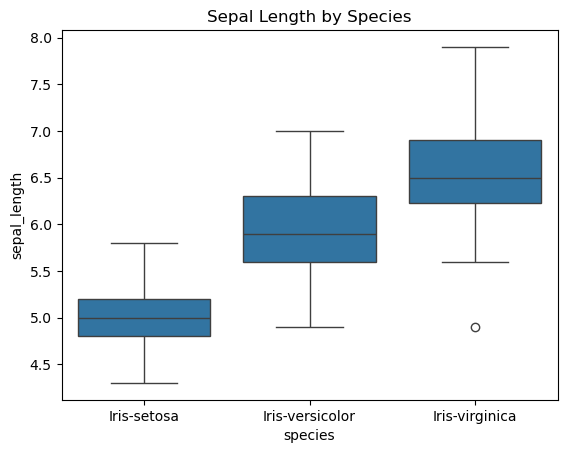

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 导入数据集
data = pd.read_csv('iris.data', header=None,
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# 数据分析
sns.pairplot(data, hue='species')
plt.show()

# 预处理
X = data.drop('species', axis=1)
y = data['species']

# 训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM分类
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# 评估模型
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 特征与类别的关系
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('Sepal Length by Species')
plt.show()
